In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [68]:
#X,Y = make_blobs(n_samples=500, n_features=2,centers=2,cluster_std=1.0,center_box=(-10.0, 10.0),shuffle=True,random_state=11)
X,Y = make_moons(n_samples=1000,noise = 0.2,random_state=1)
print(X.shape,Y.shape)


(1000, 2) (1000,)


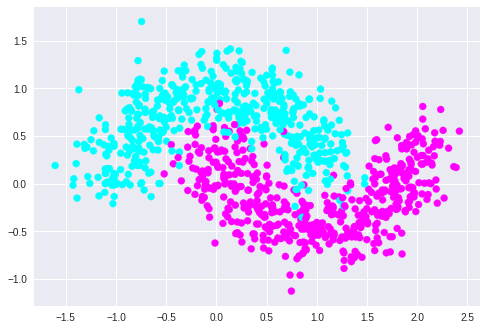

In [69]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.cool)
plt.show()

In [70]:
def sigmoid (z):
    return (1.0)/(1+np.exp(-z))

In [71]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [72]:
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [73]:
def update(X,Y,weights,learning_rate):
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/float(m)
    return weights

In [74]:
def train(X,Y,learning_rate = 1.2, maxEpochs = 1000):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l =loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights
            

In [75]:
weights = train(X,Y)

Epoch 0 Loss 0.5932
Epoch 10 Loss 0.3816
Epoch 20 Loss 0.3444
Epoch 30 Loss 0.3272
Epoch 40 Loss 0.3170
Epoch 50 Loss 0.3105
Epoch 60 Loss 0.3061
Epoch 70 Loss 0.3030
Epoch 80 Loss 0.3007
Epoch 90 Loss 0.2991
Epoch 100 Loss 0.2979
Epoch 110 Loss 0.2970
Epoch 120 Loss 0.2963
Epoch 130 Loss 0.2957
Epoch 140 Loss 0.2953
Epoch 150 Loss 0.2949
Epoch 160 Loss 0.2947
Epoch 170 Loss 0.2945
Epoch 180 Loss 0.2943
Epoch 190 Loss 0.2942
Epoch 200 Loss 0.2941
Epoch 210 Loss 0.2940
Epoch 220 Loss 0.2939
Epoch 230 Loss 0.2938
Epoch 240 Loss 0.2938
Epoch 250 Loss 0.2938
Epoch 260 Loss 0.2937
Epoch 270 Loss 0.2937
Epoch 280 Loss 0.2937
Epoch 290 Loss 0.2937
Epoch 300 Loss 0.2937
Epoch 310 Loss 0.2936
Epoch 320 Loss 0.2936
Epoch 330 Loss 0.2936
Epoch 340 Loss 0.2936
Epoch 350 Loss 0.2936
Epoch 360 Loss 0.2936
Epoch 370 Loss 0.2936
Epoch 380 Loss 0.2936
Epoch 390 Loss 0.2936
Epoch 400 Loss 0.2936
Epoch 410 Loss 0.2936
Epoch 420 Loss 0.2936
Epoch 430 Loss 0.2936
Epoch 440 Loss 0.2936
Epoch 450 Loss 0.2936

In [76]:
def getPredictions(X_Test,weights,labels = True):
    if(X_Test.shape[1] != weights.shape[0]):
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels
    

In [82]:
x1 = np.linspace(-2,3,11)
print(x1)
x2 = -(weights[0]+weights[1]*x1)/(weights[2])

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


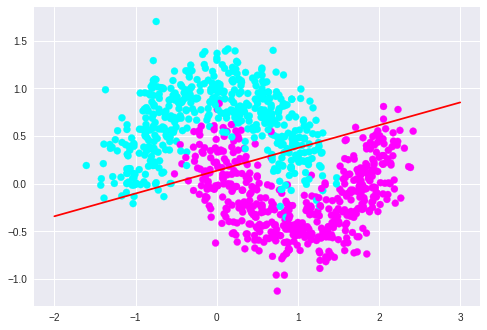

In [83]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.cool)
plt.plot(x1,x2,c = 'red')
plt.show()

In [84]:
Y_ = getPredictions(X,weights)
training_acc = np.sum(Y_==Y)/Y.shape[0]

In [85]:
print(Y_)

[0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.

In [81]:
print(training_acc)

0.869
